# ANALISIS EXPLORATORIO SERVEL 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta_chile = "../data/raw/servel_chile.csv"
ruta_extranjeros = "../data/raw/servel_extranjero.csv"
ruta_total = "../data/raw/servel_total.csv"
df_chile = pd.read_csv(ruta_chile)
df_extranjeros = pd.read_csv(ruta_extranjeros)
df_total = pd.read_csv(ruta_total)
df_chile = df_chile.dropna()
df_extranjeros = df_extranjeros.dropna()
df_total = df_total.dropna()



# VOTACION POR OPCION EN CHILE 


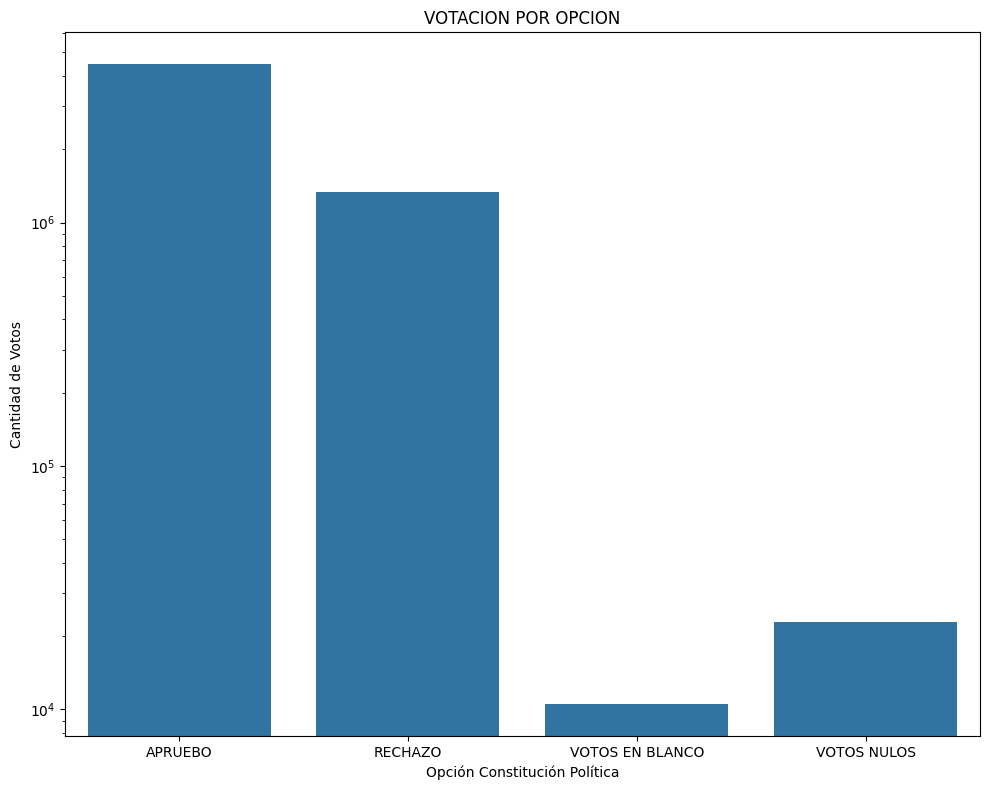

In [11]:

categorias = ["APRUEBO", "RECHAZO", "VOTOS EN BLANCO", "VOTOS NULOS"]
resumen = df_chile.groupby("Opción Constitución Política")["Votos TRICEL"].sum().reset_index()
resultados_filtrados = resumen[resumen["Opción Constitución Política"].isin(categorias)]
#Grafico de los votos 
plt.figure(figsize=(10, 8))
sns.barplot(x="Opción Constitución Política", y= "Votos TRICEL", data= resultados_filtrados)
plt.yscale("log")
plt.title("VOTACION POR OPCION")
plt.ylabel("Cantidad de Votos")
plt.tight_layout()
plt.savefig("votacion_por_opcion")
plt.show()


# VOTACION POR OPCION EN EL EXTRANJERO

C:\Users\nicom\AppData\Local\Temp\ipykernel_11520\823004067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.index, y=df.values, palette="Set2")


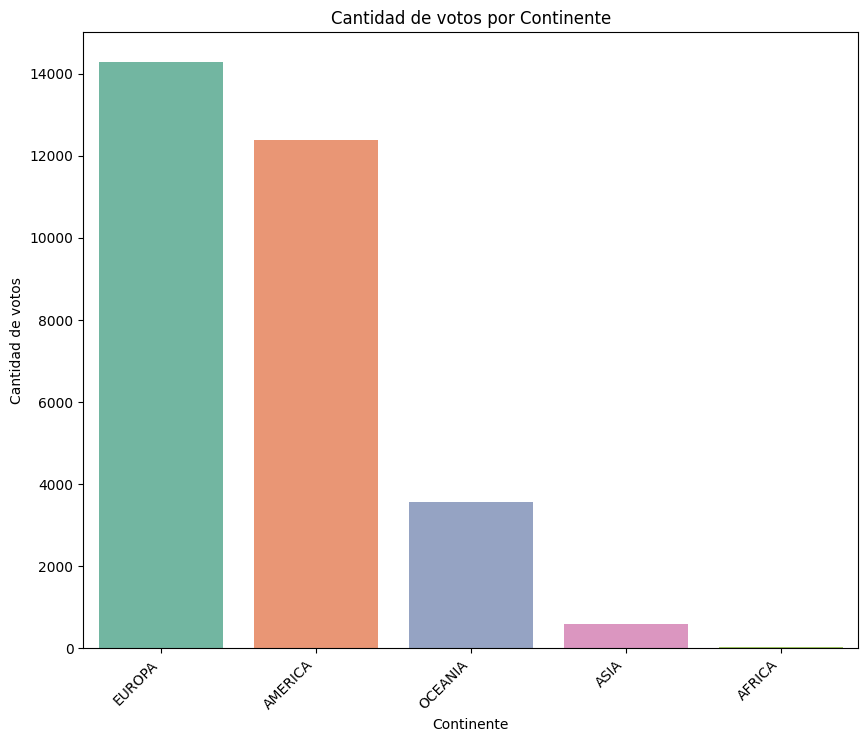

In [39]:
resumen2 = df_extranjeros.groupby("Opción Constitución Política")["Votos TRICEL"].sum().reset_index()
resumen2["Votos TRICEL"] = resumen2["Votos TRICEL"].astype(int)
apruebo_rechazo = df_extranjeros[df_extranjeros["Opción Constitución Política"].isin(["APRUEBO", "RECHAZO"])]
df = apruebo_rechazo.groupby("Continente")["Votos TRICEL"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x = df.index, y=df.values, palette="Set2")
plt.title("Cantidad de votos por Continente")
plt.xlabel("Continente")
plt.ylabel("Cantidad de votos")
plt.xticks(rotation = 45, ha = "right")
plt.savefig("grafico_votos_por_continente_extranjero.png")

# VOTACION TOTAL

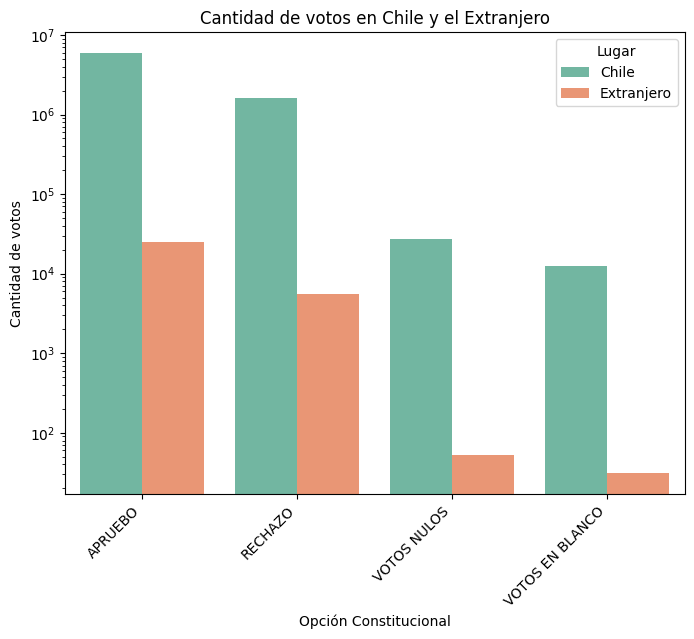

In [47]:
votos = df_total[df_total["Opción Constitución Política"].isin(["APRUEBO", "RECHAZO", "VOTOS NULOS", "VOTOS EN BLANCO"])]
df_melted = votos.melt(id_vars="Opción Constitución Política", value_vars=["Chile", "Extranjero"], var_name="Lugar", value_name="Votos")
plt.figure(figsize=(8, 6))
sns.barplot(data= df_melted, x = "Opción Constitución Política", y= "Votos", hue= "Lugar",palette="Set2")
plt.title("Cantidad de votos en Chile y el Extranjero")
plt.xlabel("Opción Constitucional")
plt.ylabel("Cantidad de votos")
plt.yscale("log")
plt.xticks(rotation = 45, ha = "right")
plt.savefig("grafico_votos_chile_y_extranjero.png")